# Using PyTorch and Qiskit to make a Variational Algorithm

### Imports

In [43]:
import qiskit as q
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import torch

In [44]:
IBMQ.load_account()
from qiskit.providers.ibmq import least_busy

ibmqfactory.load_account:WARNING:2021-05-02 14:58:36,157: Credentials are already in use. The existing account in the session will be replaced.


### The Code

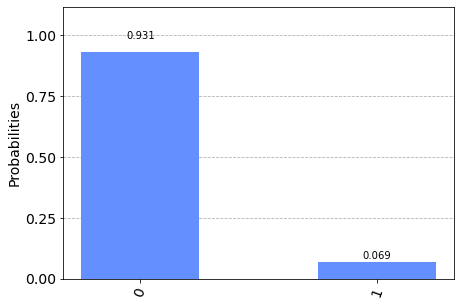

In [65]:
n = 1
#params = [np.pi/2, 0]
params = [0.54, 0.12]
qr = q.QuantumRegister(n, 'q')
cr = q.ClassicalRegister(n, 'c')
qc = q.QuantumCircuit(qr, cr)

qc.rx(params[0], 0)
qc.ry(params[1], 0)
qc.barrier()

qc.measure(qr[:n], cr[:n])

#FIGURE OUT HOW TO OPTIMIZE THESE????

#SIMULATIONS
simulator = Aer.get_backend('qasm_simulator')

# job = execute(qc, simulator, shots=1000)
job = q.execute(qc, simulator)

# Grab results from the job
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
#qc.draw('mpl')